In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
rng = np.random.default_rng()

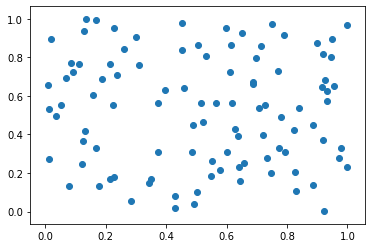

In [3]:
NUM_CITY = 100
cities = rng.random((NUM_CITY, 2))
plt.scatter(cities[:, 0], cities[:, 1])
dists_table = np.array([[np.linalg.norm(cities[i, :] - cities[j, :]) for i in range(NUM_CITY)] for j in range(NUM_CITY)])

In [4]:
def E(x):
    dists = np.array([dists_table[i, j] for i, j in zip(x[:-1], x[1:])])
    return dists.sum()

In [5]:
def dE(x, i, j):
    if j - i == 1:
        de = - dists_table[x[i-1], x[i]] - dists_table[x[j], x[j+1]]
        de += dists_table[x[i-1], x[j]] + dists_table[x[i], x[j+1]]
    else:
        de = - dists_table[x[i-1], x[i]] - dists_table[x[i], x[i+1]]
        de += - dists_table[x[j-1], x[j]] - dists_table[x[j], x[j+1]]
        de += dists_table[x[i-1], x[j]] + dists_table[x[j], x[i+1]]
        de += dists_table[x[j-1], x[i]] + dists_table[x[i], x[j+1]]
    return de

In [6]:
def plt_travel(travel):
    plt.scatter(travel[:, 0], travel[:, 1], c="black")
    plt.plot(travel[:, 0], travel[:, 1], linestyle="dashed", linewidth=1)

In [7]:
N = 500000000
INIT_B = 0.1
END_B = 100
D_B = (END_B - INIT_B) / N
PLOT_INTERVAL = N / 10

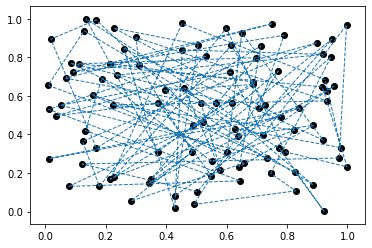

In [8]:
x = [0] + list(range(1, NUM_CITY)) + [0]
e = E(x)
choices = rng.choice(np.arange(1, NUM_CITY), size=(N, 2))
choices = np.sort(choices, axis=1)
travel = cities[x]
plt_travel(travel)

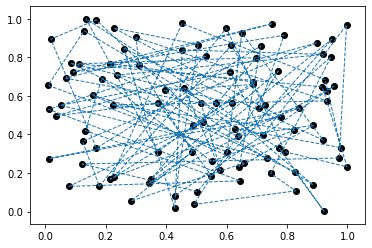

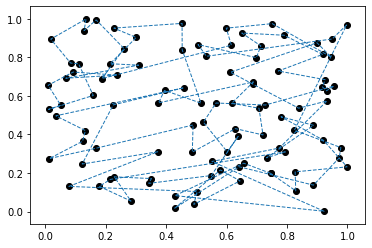

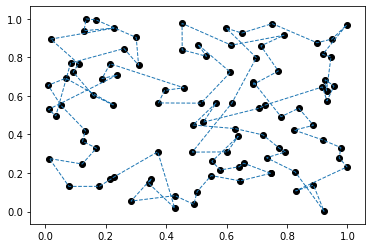

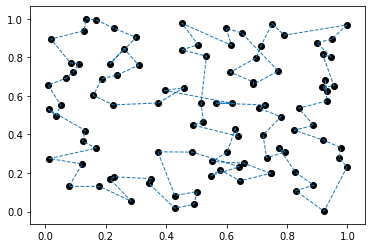

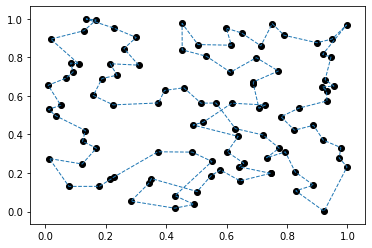

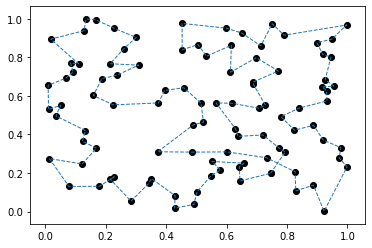

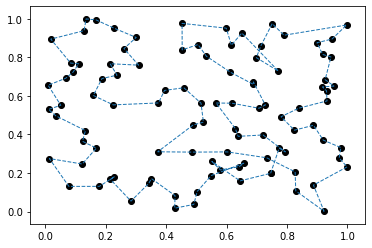

In [ ]:
beta = INIT_B
energies = []
min_e = e
min_x = deepcopy(x)
for i, choice in enumerate(choices):
    if i % PLOT_INTERVAL == 0:
        plt_travel(cities[x])
        plt.show()
    
    if choice[0] == choice[1]: continue
    de = dE(x, choice[0], choice[1])
    p = 1 - 1 / (1 + np.exp(-beta * de))

    if rng.random() < p:
        tmp_e = E(x)
        x[choice[0]], x[choice[1]] = x[choice[1]], x[choice[0]]
        e += de
    
    if i % 1000 == 0:
        energies.append(e)
        
    if e < min_e:
        min_e = e
        min_x = deepcopy(x)
        
    beta = beta + D_B

In [ ]:
plt.plot(energies[::10])

In [ ]:
plt_travel(cities[min_x])

In [ ]:
print(min_e)
print(E(min_x))

In [ ]:
x = [0] + list(range(1, NUM_CITY)) + [0]
e = E(x)
choices = rng.choice(np.arange(1, NUM_CITY), size=(N, 2))
choices = np.sort(choices, axis=1)
travel = cities[x]
plt_travel(travel)

In [ ]:
BETAS = np.linspace(10, 30, 5)
N_REP = N / len(BETAS)
PLOT_INTERVAL_REP = PLOT_INTERVAL / len(BETAS)
choices_rep = choices.reshape((int(N_REP), len(BETAS), 2))

In [ ]:
xs = [deepcopy(x) for _ in BETAS]
es = [e for _ in BETAS]
beta = INIT_B
energies = [[] for _ in BETAS]
min_e = e
min_x = deepcopy(x)
for i, tmp_choices in enumerate(choices_rep):
    if i % PLOT_INTERVAL_REP == 0:
        plt_travel(cities[min_x])
        plt.show()

    for j, (x, beta, choice) in enumerate(zip(xs, BETAS, tmp_choices)):
        if choice[0] == choice[1]: continue
        de = dE(x, choice[0], choice[1])
        p = 1 - 1 / (1 + np.exp(-beta * de))
        
        if rng.random() < p:
            tmp_e = E(x)
            x[choice[0]], x[choice[1]] = x[choice[1]], x[choice[0]]
            es[j] += de
        
        if i % 1000 == 0:
            energies[j].append(es[j])
        
        if es[j] < min_e:
            min_e = deepcopy(es[j])
            min_x = deepcopy(x)
    
    #count = 0
    for j, (beta1, beta2) in enumerate(zip(BETAS[:-1], BETAS[1:])):
        p = np.exp(-(beta2 - beta1) * (es[j] - es[j+1]))
        if rng.random() < p:
            #count += 1
            es[j], es[j+1] = es[j+1], es[j]
            xs[j], xs[j+1] = xs[j+1], xs[j]
            pass
    #print(count / (len(BETAS) - 1))
            

In [ ]:
PLOT_BETA_INTERVAL = 10
for i in range(len(BETAS)):
    if i % PLOT_BETA_INTERVAL:
        plt.plot(energies[i])

In [ ]:
plt_travel(cities[min_x])

In [ ]:
min_e

In [ ]:
E(min_x)